# Demo for calculating the spectrum of a simple system

In this demo we will show how to calculate the sprectrum of the following system

$$
\dot x(t) = \begin{pmatrix} -5 & 1 \\ 2 & 6 \end{pmatrix} x(t) 
+ \left(\begin{array}{cc} -2 & 1 \\ 4 & -1 \end{array}\right) x(t-\tau),
$$

where $x: \mathbb R \to \mathbb R^2$ and $\tau=1$.

## Add paths and load sym package

In [1]:
ddebiftoolpath='../../'; %point this to the main directory of DDE-BifTool
addpath(strcat(ddebiftoolpath,'ddebiftool'),...
    strcat(ddebiftoolpath,'ddebiftool_extra_psol'),...
    strcat(ddebiftoolpath,'ddebiftool_extra_symbolic'),...
    strcat(ddebiftoolpath,'ddebiftool_extra_nmfm'),...
    strcat(ddebiftoolpath,'ddebiftool_utilities'));

## Create parameter names as strings and define fixed parameters
The demo has a single parameter $\tau$

In [2]:
parnames={'tau'};

## Create symbols for parameters, states and delays states
The array |par| is the array of symbols in the same order as parnames.
Due to the following two lines we may, for example, use either tau or
par(1) to refer to the delay.

In [3]:
syms(parnames{:});       % create symbol for tau
par = cell2sym(parnames);  % now tau is par(1) etc

## Define system using symbolic algebra
Create symbols for $x(t)$, $x(t-\tau)$, $y(t)$, $y(t-\tau)$, ect.

In [4]:
syms x1 x2 x1tau x2tau

## Define the system

In [5]:
A0 = [-5 1; 2 6];
A1 = [-2 1; 4 -1];
dx_dt = A0*[x1; x2] + A1*[x1tau; x2tau];

## Differentiate and generate code, exporting it to sym_GyanSwarupNag_mf (multi-linear forms)

In [6]:
[fstr,derivs]=dde_sym2funcs(...
    [dx_dt(1); dx_dt(2)],... % 2 x 1 array of derivative symbolic expressions
    [x1,x1tau;x2,x2tau],... % 2 x (ntau+1) array of symbols for states (current & delayed)
    par,... % 1 x np (or np x 1) array of symbols used for parameters
    'filename','sym_GyanSwarupNag_mf'... % optional argument specifying output file
);

## Set the funcs structure using the symbolic generated derivatives
We load the precalculated multilinear forms. These have been generated above.

In [7]:
cind=[parnames;num2cell(1:length(parnames))];
ind=struct(cind{:}); % now we can use ind.tau instead of par(1)
funcs=set_symfuncs(@sym_GyanSwarupNag_mf, 'sys_tau',@() ind.tau);

## Construct steady-state point

In [8]:
stst=dde_stst_create('x', [0;0]);
tau = 1;
stst.parameter(ind.tau) = tau;

## Calculate stability and plot the result
We are now in the position to calculate the eigenvalues.

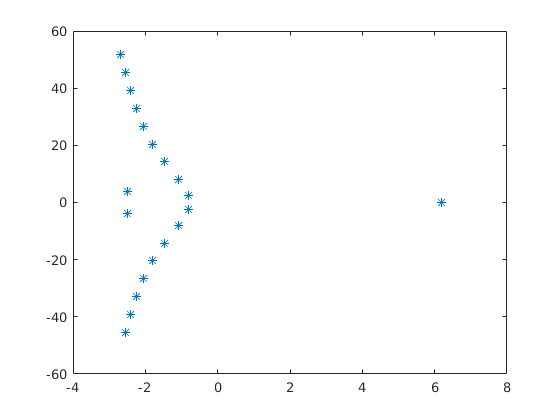

In [9]:
method_stst=df_mthod(funcs,'stst');
method_stst.stability.minimal_real_part=-10;
stst.stability=p_stabil(funcs, stst, method_stst.stability);
plot(stst.stability.l1, '*')

## Show dominant eigenvalues

In [10]:
stst.stability.l1(1:3)


ans =

   6.1779 + 0.0000i
  -0.8093 + 2.2879i
  -0.8093 - 2.2879i

